# Bonus - Diabetes Prediction.

## Section 3

In this notebook I will use different models to improve the recall of my models since having high true positives and less false negatives are very important. I will use the following:
* Logestic Regression
* Decission Tree
* RandomForest
* AdaBoost
* Gradiant Boosting
* XG Boosting
* Neural Network
* RandomizedSearchCV
* GridSearchCV

## Identifying Performance metrics


##### The performance metrics that I will use to measure the performance of the models are

* Accuracy: This is the most intuitive performance measure. It is the ratio of correctly predicted observation to the total observations.

* Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. High precision relates to a low false positive rate.

* Recall (Sensitivity): This is the ratio of correctly predicted positive observations to all actual positives.

* F1 Score: This is the weighted average of precision and recall. Therefore, this score takes both false positives and false negatives into account. It is usually more useful than accuracy, especially if there is an an uneven class distribution.

##### **I am going to use rmse and recall as my score measure since in my case it is important to have high true positives and less false negatives.

## Import necessary packages

In [1]:
# import packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import collections

np.random.seed(1)

## Loading the data 

In [2]:
X_train = pd.read_csv('bonus-train_X-data.csv') 
y_train = pd.read_csv('bonus-train_y-data.csv') 
X_test = pd.read_csv('bonus-test_X-data.csv') 
y_test = pd.read_csv('bonus-test_y-data.csv')

In [3]:
performance = pd.DataFrame({"model": [], "accuracy": [], "F1": [], ">>recall": [], "precision": []})
rmses = pd.DataFrame({"model": [], "rmse": []})

### Prediction using Logestic regression

In [4]:
log_reg_model = LogisticRegression(penalty=None, max_iter=900)
_ = log_reg_model.fit(X_train,np.ravel(y_train))

y_pred = log_reg_model.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))


              precision    recall  f1-score   support

           0     0.7857    0.9041    0.8408       146
           1     0.7778    0.5765    0.6622        85

    accuracy                         0.7835       231
   macro avg     0.7817    0.7403    0.7515       231
weighted avg     0.7828    0.7835    0.7750       231



[('Outcome', 1)]


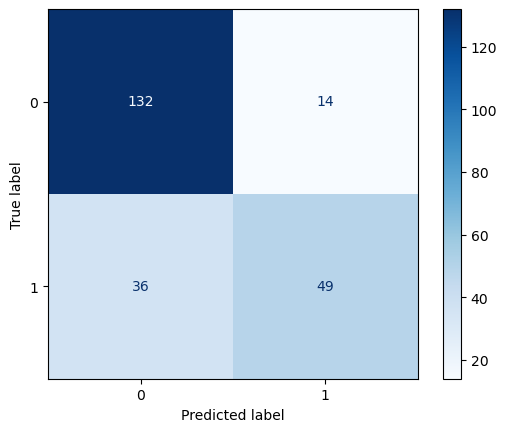

In [5]:

counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [6]:
accuracy = log_reg_model.score(X_test, y_test)
print(f"{'Accuracy:':20s}{accuracy:.4f}")

F1 = f1_score(y_test, y_pred)
print(f"{'F1:':20s}{F1:.4f}")


recall = recall_score(y_test, y_pred)
print(f"{'>>Recall:':20s}{recall:.4f}")



precision = precision_score(y_test, y_pred)
print(f"{'Precision:':20s}{precision:.4f}")


performance = pd.concat([performance, pd.DataFrame({"model": 'Logestic Regression', "accuracy": [accuracy], 
                                                    "F1": [F1], ">>recall": [recall], "precision": [precision]})])


Accuracy:           0.7835
F1:                 0.6622
>>Recall:           0.5765
Precision:          0.7778


In [7]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Logestic regression Test RMSE: {test_rmse}")

rmses = pd.concat([rmses,pd.DataFrame({"model": 'Logestic Regression', "rmse": [test_rmse]})])

Logestic regression Test RMSE: 0.4652421051992354


### Changing to liblinear solver

In [8]:
log_reg_liblin_model = LogisticRegression(solver='liblinear').fit(X_train, np.ravel(y_train))
y_pred = log_reg_liblin_model.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7857    0.9041    0.8408       146
           1     0.7778    0.5765    0.6622        85

    accuracy                         0.7835       231
   macro avg     0.7817    0.7403    0.7515       231
weighted avg     0.7828    0.7835    0.7750       231



[('Outcome', 1)]


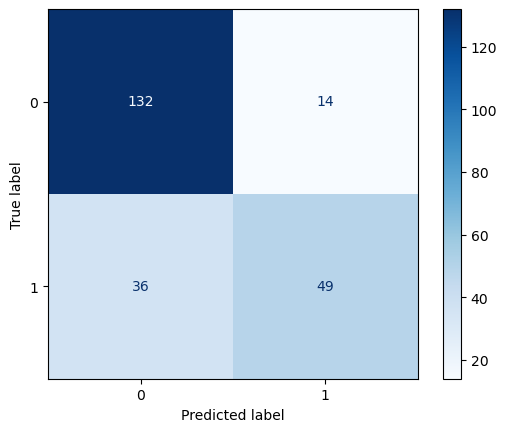

In [9]:
counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [10]:
accuracy = log_reg_liblin_model.score(X_test, y_test)
print(f"{'Accuracy:':20s}{accuracy:.4f}")

F1 = f1_score(y_test, y_pred)
print(f"{'F1:':20s}{F1:.4f}")


recall = recall_score(y_test, y_pred)
print(f"{'>>Recall:':20s}{recall:.4f}")



precision = precision_score(y_test, y_pred)
print(f"{'Precision:':20s}{precision:.4f}")


performance = pd.concat([performance, pd.DataFrame({"model": 'Logestic Regression liblin', "accuracy": [accuracy], 
                                                    "F1": [F1], ">>recall": [recall], "precision": [precision]})])


Accuracy:           0.7835
F1:                 0.6622
>>Recall:           0.5765
Precision:          0.7778


In [11]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Logestic regression liblin RMSE: {test_rmse}")
rmses = pd.concat([rmses,pd.DataFrame({"model": 'Logestic Regression liblin', "rmse": [test_rmse]})])

Logestic regression liblin RMSE: 0.4652421051992354


### Prediction using L2 Regularization

In [12]:
log_reg_L2_model = LogisticRegression(penalty='l2', max_iter=1000)
_ = log_reg_L2_model.fit(X_train, np.ravel(y_train))

y_pred = log_reg_L2_model.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7857    0.9041    0.8408       146
           1     0.7778    0.5765    0.6622        85

    accuracy                         0.7835       231
   macro avg     0.7817    0.7403    0.7515       231
weighted avg     0.7828    0.7835    0.7750       231



In [13]:
accuracy = log_reg_L2_model.score(X_test, y_test)
print(f"{'Accuracy:':20s}{accuracy:.4f}")

F1 = f1_score(y_test, y_pred)
print(f"{'F1:':20s}{F1:.4f}")


recall = recall_score(y_test, y_pred)
print(f"{'>>Recall:':20s}{recall:.4f}")



precision = precision_score(y_test, y_pred)
print(f"{'Precision:':20s}{precision:.4f}")


performance = pd.concat([performance, pd.DataFrame({"model": 'Logestic Regression L2', "accuracy": [accuracy], 
                                                    "F1": [F1], ">>recall": [recall], "precision": [precision]})])


Accuracy:           0.7835
F1:                 0.6622
>>Recall:           0.5765
Precision:          0.7778


In [14]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Logestic Regression L2 RMSE: {test_rmse}")

rmses = pd.concat([rmses,pd.DataFrame({"model": 'Logestic Regression L2', "rmse": [test_rmse]})])

Logestic Regression L2 RMSE: 0.4652421051992354


### Prediction using L1 Regularization

In [15]:
log_reg_L1_model = LogisticRegression(solver='liblinear', penalty='l1')
_ = log_reg_L1_model.fit(X_train, np.ravel(y_train))

y_pred = log_reg_L1_model.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7857    0.9041    0.8408       146
           1     0.7778    0.5765    0.6622        85

    accuracy                         0.7835       231
   macro avg     0.7817    0.7403    0.7515       231
weighted avg     0.7828    0.7835    0.7750       231



[('Outcome', 1)]


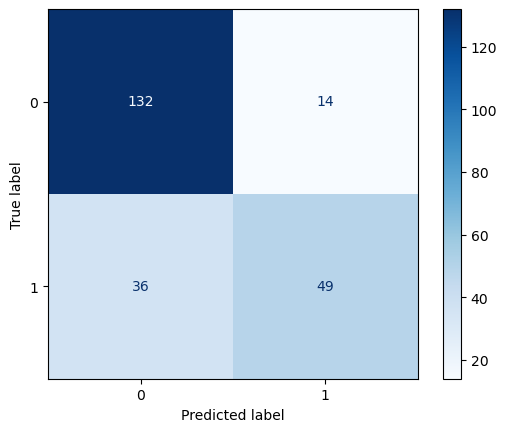

In [16]:

counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [17]:
accuracy = log_reg_L1_model.score(X_test, y_test)
print(f"{'Accuracy:':20s}{accuracy:.4f}")

F1 = f1_score(y_test, y_pred)
print(f"{'F1:':20s}{F1:.4f}")


recall = recall_score(y_test, y_pred)
print(f"{'>>Recall:':20s}{recall:.4f}")



precision = precision_score(y_test, y_pred)
print(f"{'Precision:':20s}{precision:.4f}")


performance = pd.concat([performance, pd.DataFrame({"model": 'Logestic Regression L1', "accuracy": [accuracy], 
                                                    "F1": [F1], ">>recall": [recall], "precision": [precision]})])


Accuracy:           0.7835
F1:                 0.6622
>>Recall:           0.5765
Precision:          0.7778


In [18]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Logestic Regression L1 RMSE: {test_rmse}")

rmses = pd.concat([rmses,pd.DataFrame({"model": 'Logestic Regression L1', "rmse": [test_rmse]})])

Logestic Regression L1 RMSE: 0.4652421051992354


### Prediction using Elastic Net Regularization

In [19]:
log_reg_elastic_model = LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.5, max_iter=1500)
_ = log_reg_elastic_model.fit(X_train, np.ravel(y_train))

y_pred = log_reg_liblin_model.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7857    0.9041    0.8408       146
           1     0.7778    0.5765    0.6622        85

    accuracy                         0.7835       231
   macro avg     0.7817    0.7403    0.7515       231
weighted avg     0.7828    0.7835    0.7750       231



[('Outcome', 1)]


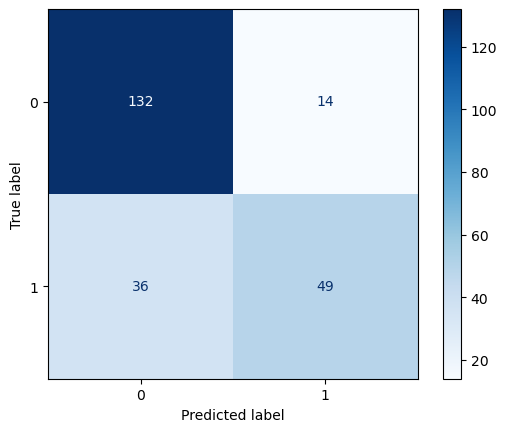

In [20]:

counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [21]:
accuracy = log_reg_elastic_model.score(X_test, y_test)
print(f"{'Accuracy:':20s}{accuracy:.4f}")

F1 = f1_score(y_test, y_pred)
print(f"{'F1:':20s}{F1:.4f}")


recall = recall_score(y_test, y_pred)
print(f"{'>>Recall:':20s}{recall:.4f}")



precision = precision_score(y_test, y_pred)
print(f"{'Precision:':20s}{precision:.4f}")


performance = pd.concat([performance, pd.DataFrame({"model": 'Logestic Regression Elastic', "accuracy": [accuracy], 
                                                    "F1": [F1], ">>recall": [recall], "precision": [precision]})])


Accuracy:           0.7835
F1:                 0.6622
>>Recall:           0.5765
Precision:          0.7778


In [22]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Logestic Regression Elastic RMSE: {test_rmse}")

rmses = pd.concat([rmses,pd.DataFrame({"model": 'Logestic Regression Elastic', "rmse": [test_rmse]})])

Logestic Regression Elastic RMSE: 0.4652421051992354


## Prediction with Decision Tree (using default parameters)



Creating a decision tree using all of the default parameters

In [23]:
dtree=DecisionTreeClassifier()

Fit the model to the training data

In [24]:
_ = dtree.fit(X_train, y_train)

In [25]:
y_pred = dtree.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7582    0.7945    0.7759       146
           1     0.6154    0.5647    0.5890        85

    accuracy                         0.7100       231
   macro avg     0.6868    0.6796    0.6824       231
weighted avg     0.7056    0.7100    0.7071       231



[('Outcome', 1)]


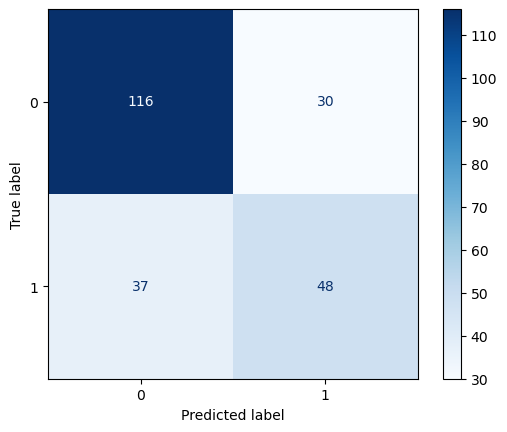

In [27]:

counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [28]:
accuracy = dtree.score(X_test, y_test)
print(f"{'Accuracy:':20s}{accuracy:.4f}")

F1 = f1_score(y_test, y_pred)
print(f"{'F1:':20s}{F1:.4f}")


recall = recall_score(y_test, y_pred)
print(f"{'>>Recall:':20s}{recall:.4f}")



precision = precision_score(y_test, y_pred)
print(f"{'Precision:':20s}{precision:.4f}")


performance = pd.concat([performance, pd.DataFrame({"model": 'Decision Tree', "accuracy": [accuracy], 
                                                    "F1": [F1], ">>recall": [recall], "precision": [precision]})])


Accuracy:           0.7100
F1:                 0.5890
>>Recall:           0.5647
Precision:          0.6154


In [29]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Decision Tree Test RMSE: {test_rmse}")

rmses = pd.concat([rmses,pd.DataFrame({"model": 'Decision Tree', "rmse": [test_rmse]})])

Decision Tree Test RMSE: 0.5385566730097122


## Prediction with Decision Tree (using random search)

In [30]:
%%time

score_measure = "recall"
kfolds = 4

param_grid = {
    'min_samples_split': [5,10,50],  
    'min_samples_leaf': [10,20,50],
    'min_impurity_decrease': [0.0010, 0.0020, 0.0030],
    'max_leaf_nodes': [5,25,50], 
    'max_depth': [10,20],
    'criterion': ['entropy', 'gini'],
}

rand_search_dtree = RandomizedSearchCV(estimator = dtree, param_distributions=param_grid, cv=kfolds, n_iter=200,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)
_ = rand_search_dtree.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search_dtree.best_score_}")
print(f"... with parameters: {rand_search_dtree.best_params_}")

bestaccuracydTree = rand_search_dtree.best_estimator_

Fitting 4 folds for each of 200 candidates, totalling 800 fits
The best recall score is 0.6503623188405797
... with parameters: {'min_samples_split': 50, 'min_samples_leaf': 10, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 25, 'max_depth': 10, 'criterion': 'entropy'}
CPU times: total: 1.12 s
Wall time: 5.36 s


In [31]:
y_pred = rand_search_dtree.predict(X_test)

In [32]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7987    0.8699    0.8328       146
           1     0.7361    0.6235    0.6752        85

    accuracy                         0.7792       231
   macro avg     0.7674    0.7467    0.7540       231
weighted avg     0.7757    0.7792    0.7748       231



[('Outcome', 1)]


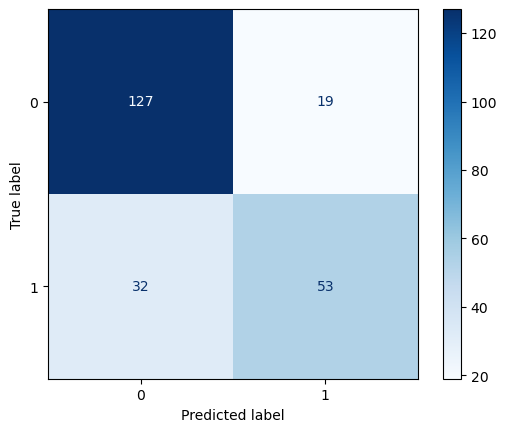

In [33]:

counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [34]:
accuracy = rand_search_dtree.score(X_test, y_test)
print(f"{'Accuracy:':20s}{accuracy:.4f}")

F1 = f1_score(y_test, y_pred)
print(f"{'F1:':20s}{F1:.4f}")


recall = recall_score(y_test, y_pred)
print(f"{'>>Recall:':20s}{recall:.4f}")



precision = precision_score(y_test, y_pred)
print(f"{'Precision:':20s}{precision:.4f}")


performance = pd.concat([performance, pd.DataFrame({"model": 'Decision Tree Random search', "accuracy": [accuracy], 
                                                    "F1": [F1], ">>recall": [recall], "precision": [precision]})])


Accuracy:           0.6235
F1:                 0.6752
>>Recall:           0.6235
Precision:          0.7361


In [35]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Decision Tree Random search RMSE: {test_rmse}")

rmses = pd.concat([rmses,pd.DataFrame({"model": 'Decision Tree Random search', "rmse": [test_rmse]})])

Decision Tree Random search RMSE: 0.4698714938993648


## Prediction with Decision Tree (using exhaustive grid search on random search)

In [36]:
%%time

score_measure = "recall"

kfolds = 4
min_samples_split = rand_search_dtree.best_params_['min_samples_split']
min_samples_leaf = rand_search_dtree.best_params_['min_samples_leaf']
min_impurity_decrease = rand_search_dtree.best_params_['min_impurity_decrease']
max_leaf_nodes = rand_search_dtree.best_params_['max_leaf_nodes']
max_depth = rand_search_dtree.best_params_['max_depth']
criterion = rand_search_dtree.best_params_['criterion']

param_grid = {
    'min_samples_split': np.arange(min_samples_split-1,min_samples_split+1),  
    'min_samples_leaf': np.arange(min_samples_leaf-1,min_samples_leaf+1),
    'min_impurity_decrease': np.arange(min_impurity_decrease-0.0001, min_impurity_decrease+0.0005),
    'max_leaf_nodes': np.arange(max_leaf_nodes-1,max_leaf_nodes+1), 
    'max_depth': np.arange(max_depth-1,max_depth+1), 
    'criterion': [criterion]
}

grid_search_dtree = GridSearchCV(estimator = dtree, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search_dtree.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search_dtree.best_score_}")
print(f"... with parameters: {grid_search_dtree.best_params_}")

bestaccuracydTree = grid_search_dtree.best_estimator_

Fitting 4 folds for each of 16 candidates, totalling 64 fits
The best recall score is 0.6503623188405797
... with parameters: {'criterion': 'entropy', 'max_depth': 9, 'max_leaf_nodes': 24, 'min_impurity_decrease': 0.0009, 'min_samples_leaf': 10, 'min_samples_split': 49}
CPU times: total: 78.1 ms
Wall time: 250 ms


Review of the performance of the model on the validation/test data

In [37]:
y_pred = grid_search_dtree.predict(X_test)

In [38]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7987    0.8699    0.8328       146
           1     0.7361    0.6235    0.6752        85

    accuracy                         0.7792       231
   macro avg     0.7674    0.7467    0.7540       231
weighted avg     0.7757    0.7792    0.7748       231



[('Outcome', 1)]


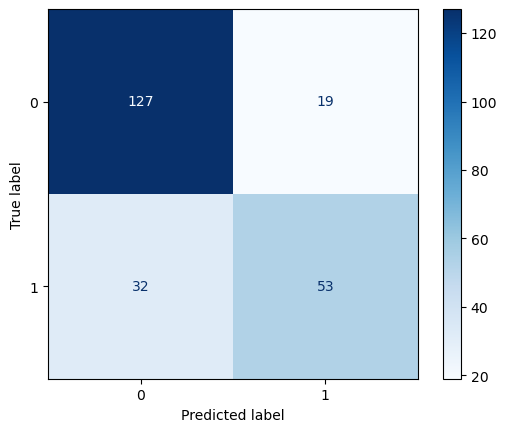

In [39]:

counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [40]:
accuracy = grid_search_dtree.score(X_test, y_test)
print(f"{'Accuracy:':20s}{accuracy:.4f}")

F1 = f1_score(y_test, y_pred)
print(f"{'F1:':20s}{F1:.4f}")


recall = recall_score(y_test, y_pred)
print(f"{'>>Recall:':20s}{recall:.4f}")



precision = precision_score(y_test, y_pred)
print(f"{'Precision:':20s}{precision:.4f}")


performance = pd.concat([performance, pd.DataFrame({"model": 'Decision Tree grid search', "accuracy": [accuracy], 
                                                    "F1": [F1], ">>recall": [recall], "precision": [precision]})])


Accuracy:           0.6235
F1:                 0.6752
>>Recall:           0.6235
Precision:          0.7361


In [41]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Decision Tree grid search RMSE: {test_rmse}")

rmses = pd.concat([rmses,pd.DataFrame({"model": 'Decision Tree grid search', "rmse": [test_rmse]})])

Decision Tree grid search RMSE: 0.4698714938993648


## Prediction with RandomForest (using default parameters)

In [42]:
rforest = RandomForestClassifier()

In [43]:
_ = rforest.fit(X_train, np.ravel(y_train))

In [44]:
y_pred = rforest.predict(X_test)

In [45]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8239    0.8973    0.8590       146
           1     0.7917    0.6706    0.7261        85

    accuracy                         0.8139       231
   macro avg     0.8078    0.7839    0.7926       231
weighted avg     0.8120    0.8139    0.8101       231



[('Outcome', 1)]


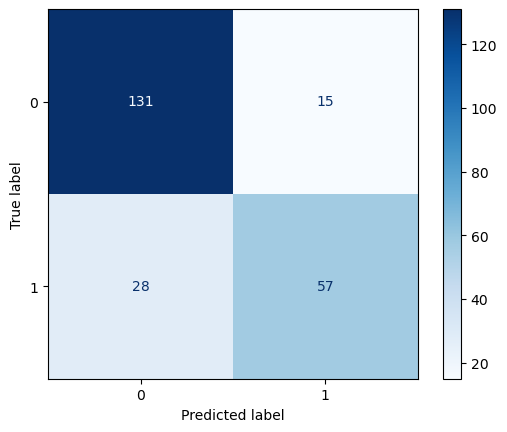

In [46]:

counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [47]:
accuracy = rforest.score(X_test, y_test)
print(f"{'Accuracy:':20s}{accuracy:.4f}")

F1 = f1_score(y_test, y_pred)
print(f"{'F1:':20s}{F1:.4f}")


recall = recall_score(y_test, y_pred)
print(f"{'>>Recall:':20s}{recall:.4f}")



precision = precision_score(y_test, y_pred)
print(f"{'Precision:':20s}{precision:.4f}")


performance = pd.concat([performance, pd.DataFrame({"model": 'Random forest', "accuracy": [accuracy], 
                                                    "F1": [F1], ">>recall": [recall], "precision": [precision]})])


Accuracy:           0.8139
F1:                 0.7261
>>Recall:           0.6706
Precision:          0.7917


In [48]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Random forest Test RMSE: {test_rmse}")

rmses = pd.concat([rmses,pd.DataFrame({"model": 'Random forest', "rmse": [test_rmse]})])

Random forest Test RMSE: 0.43144777916589877


## Prediction with RandomForest (using random search)

In [49]:
%%time
score_measure = "recall"
kfolds = 4

param_grid = {
    'min_samples_split': [5,10,50],  
    'min_samples_leaf': [10,20,50],
    'min_impurity_decrease': [0.0010, 0.0020, 0.0030],
    'max_leaf_nodes': [5,25,50], 
    'max_depth': [10,20],
    'criterion': ['entropy', 'gini'],
}


rand_search_rforest = RandomizedSearchCV(estimator = rforest, param_distributions=param_grid, cv=kfolds, n_iter=200,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)
_ = rand_search_rforest.fit(X_train, np.ravel(y_train))

print(f"The best {score_measure} score is {rand_search_rforest.best_score_}")
print(f"... with parameters: {rand_search_rforest.best_params_}")

bestRecallrforest = rand_search_rforest.best_estimator_

Fitting 4 folds for each of 200 candidates, totalling 800 fits
The best recall score is 0.5246376811594203
... with parameters: {'min_samples_split': 10, 'min_samples_leaf': 10, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 25, 'max_depth': 20, 'criterion': 'gini'}
CPU times: total: 1.98 s
Wall time: 29.6 s


In [50]:
y_pred = rand_search_rforest.predict(X_test)

              precision    recall  f1-score   support

           0     0.7778    0.9110    0.8391       146
           1     0.7833    0.5529    0.6483        85

    accuracy                         0.7792       231
   macro avg     0.7806    0.7320    0.7437       231
weighted avg     0.7798    0.7792    0.7689       231

[('Outcome', 1)]


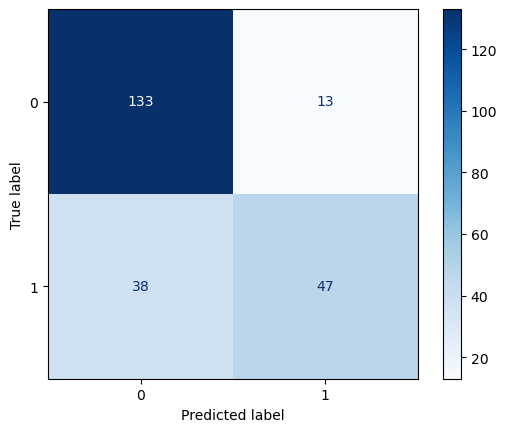

In [51]:
print(classification_report(y_test, y_pred, digits=4))


counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [52]:
accuracy = rand_search_rforest.score(X_test, y_test)
print(f"{'Accuracy:':20s}{accuracy:.4f}")

F1 = f1_score(y_test, y_pred)
print(f"{'F1:':20s}{F1:.4f}")


recall = recall_score(y_test, y_pred)
print(f"{'>>Recall:':20s}{recall:.4f}")



precision = precision_score(y_test, y_pred)
print(f"{'Precision:':20s}{precision:.4f}")


performance = pd.concat([performance, pd.DataFrame({"model": 'Random forest random search', "accuracy": [accuracy], 
                                                    "F1": [F1], ">>recall": [recall], "precision": [precision]})])


Accuracy:           0.5529
F1:                 0.6483
>>Recall:           0.5529
Precision:          0.7833


In [53]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Random forest random search RMSE: {test_rmse}")

rmses = pd.concat([rmses,pd.DataFrame({"model": 'Random forest random search', "rmse": [test_rmse]})])

Random forest random search RMSE: 0.4698714938993648


## Prediction with RandomForest (using exhaustive grid search on random search)

In [54]:
%%time

score_measure = "accuracy"

kfolds = 4
min_samples_split = rand_search_rforest.best_params_['min_samples_split']
min_samples_leaf = rand_search_rforest.best_params_['min_samples_leaf']
min_impurity_decrease = rand_search_rforest.best_params_['min_impurity_decrease']
max_leaf_nodes = rand_search_rforest.best_params_['max_leaf_nodes']
max_depth = rand_search_rforest.best_params_['max_depth']
criterion = rand_search_rforest.best_params_['criterion']

param_grid = {
    'min_samples_split': np.arange(min_samples_split-1,min_samples_split+1),  
    'min_samples_leaf': np.arange(min_samples_leaf-1,min_samples_leaf+1),
    'min_impurity_decrease': np.arange(min_impurity_decrease-0.0001, min_impurity_decrease+0.0005),
    'max_leaf_nodes': np.arange(max_leaf_nodes-1,max_leaf_nodes+1), 
    'max_depth': np.arange(max_depth-1,max_depth+1), 
    'criterion': [criterion]
}


grid_search_rforest = GridSearchCV(estimator = rforest, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search_rforest.fit(X_train, np.ravel(y_train))

print(f"The best {score_measure} score is {grid_search_rforest.best_score_}")
print(f"... with parameters: {grid_search_rforest.best_params_}")

bestRecallTree = grid_search_rforest.best_estimator_

Fitting 4 folds for each of 16 candidates, totalling 64 fits
The best accuracy score is 0.7672056384742952
... with parameters: {'criterion': 'gini', 'max_depth': 19, 'max_leaf_nodes': 25, 'min_impurity_decrease': 0.0009, 'min_samples_leaf': 10, 'min_samples_split': 10}
CPU times: total: 266 ms
Wall time: 2.75 s


In [55]:
y_pred = grid_search_rforest.predict(X_test)

In [56]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7882    0.9178    0.8481       146
           1     0.8033    0.5765    0.6712        85

    accuracy                         0.7922       231
   macro avg     0.7958    0.7471    0.7597       231
weighted avg     0.7938    0.7922    0.7830       231



[('Outcome', 1)]


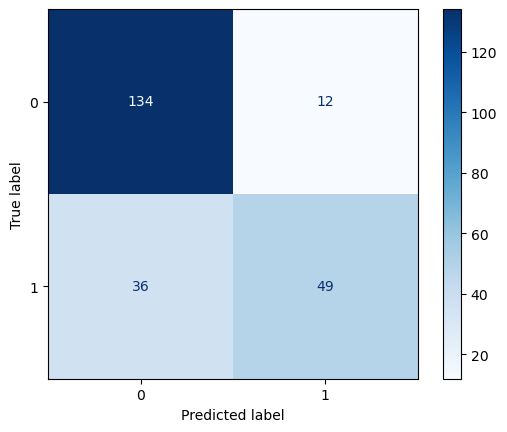

In [57]:

counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [58]:
accuracy = grid_search_rforest.score(X_test, y_test)
print(f"{'Accuracy:':20s}{accuracy:.4f}")

F1 = f1_score(y_test, y_pred)
print(f"{'F1:':20s}{F1:.4f}")


recall = recall_score(y_test, y_pred)
print(f"{'>>Recall:':20s}{recall:.4f}")



precision = precision_score(y_test, y_pred)
print(f"{'Precision:':20s}{precision:.4f}")


performance = pd.concat([performance, pd.DataFrame({"model": 'Random forest grid search', "accuracy": [accuracy], 
                                                    "F1": [F1], ">>recall": [recall], "precision": [precision]})])


Accuracy:           0.7922
F1:                 0.6712
>>Recall:           0.5765
Precision:          0.8033


In [59]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Random forest grid search RMSE: {test_rmse}")

rmses = pd.concat([rmses,pd.DataFrame({"model": 'Random forest grid search', "rmse": [test_rmse]})])

Random forest grid search RMSE: 0.4558423058385518


## Prediction with ADABoost (using default parameters)

In [60]:
aboost = AdaBoostClassifier()

In [61]:
_ = aboost.fit(X_train, np.ravel(y_train))

In [62]:
y_pred = aboost.predict(X_test)

In [63]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7892    0.8973    0.8397       146
           1     0.7692    0.5882    0.6667        85

    accuracy                         0.7835       231
   macro avg     0.7792    0.7427    0.7532       231
weighted avg     0.7818    0.7835    0.7761       231



[('Outcome', 1)]


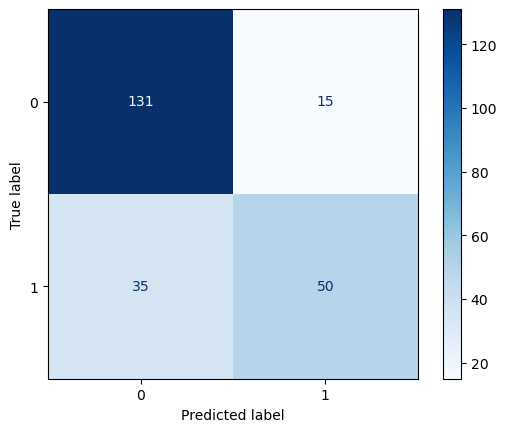

In [64]:

counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [65]:
accuracy = aboost.score(X_test, y_test)
print(f"{'Accuracy:':20s}{accuracy:.4f}")

F1 = f1_score(y_test, y_pred)
print(f"{'F1:':20s}{F1:.4f}")


recall = recall_score(y_test, y_pred)
print(f"{'>>Recall:':20s}{recall:.4f}")



precision = precision_score(y_test, y_pred)
print(f"{'Precision:':20s}{precision:.4f}")


performance = pd.concat([performance, pd.DataFrame({"model": 'ADABoost', "accuracy": [accuracy], 
                                                    "F1": [F1], ">>recall": [recall], "precision": [precision]})])


Accuracy:           0.7835
F1:                 0.6667
>>Recall:           0.5882
Precision:          0.7692


In [66]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"ADABoost Test RMSE: {test_rmse}")

rmses = pd.concat([rmses,pd.DataFrame({"model": 'ADABoost', "rmse": [test_rmse]})])

ADABoost Test RMSE: 0.4652421051992354


## Prediction with ADABoost (using random search)

In [67]:
%%time

score_measure = "recall"
kfolds = 4

param_grid = {
    ##'max_depth': np.arange(3,50), - can not use in random search
    'algorithm': ['SAMME', 'SAMME.R'],
    'learning_rate': np.logspace(0.1, 0.5),
    'n_estimators': np.arange(50, 500),
    'random_state': [42], #to control the randomness of the estimator
}

rand_search_aboost = RandomizedSearchCV(estimator = aboost, param_distributions=param_grid, cv=kfolds, n_iter=200,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)
_ = rand_search_aboost.fit(X_train,np.ravel( y_train))

print(f"The best {score_measure} score is {rand_search_aboost.best_score_}")
print(f"... with parameters: {rand_search_aboost.best_params_}")

bestRecallTree = rand_search_aboost.best_estimator_

Fitting 4 folds for each of 200 candidates, totalling 800 fits
The best recall score is 0.6176328502415459
... with parameters: {'random_state': 42, 'n_estimators': 484, 'learning_rate': 1.7329080141679256, 'algorithm': 'SAMME.R'}
CPU times: total: 2.31 s
Wall time: 1min 47s


In [68]:
y_pred = rand_search_aboost.predict(X_test)

In [69]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7707    0.8288    0.7987       146
           1     0.6622    0.5765    0.6164        85

    accuracy                         0.7359       231
   macro avg     0.7164    0.7026    0.7075       231
weighted avg     0.7308    0.7359    0.7316       231



[('Outcome', 1)]


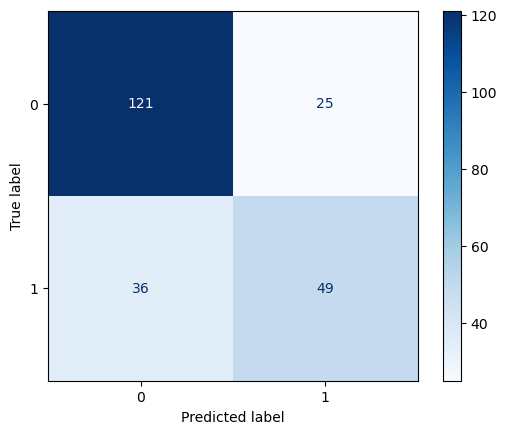

In [70]:

counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [71]:
accuracy = rand_search_aboost.score(X_test, y_test)
print(f"{'Accuracy:':20s}{accuracy:.4f}")

F1 = f1_score(y_test, y_pred)
print(f"{'F1:':20s}{F1:.4f}")


recall = recall_score(y_test, y_pred)
print(f"{'>>Recall:':20s}{recall:.4f}")



precision = precision_score(y_test, y_pred)
print(f"{'Precision:':20s}{precision:.4f}")


performance = pd.concat([performance, pd.DataFrame({"model": 'ADABoost random search', "accuracy": [accuracy], 
                                                    "F1": [F1], ">>recall": [recall], "precision": [precision]})])


Accuracy:           0.5765
F1:                 0.6164
>>Recall:           0.5765
Precision:          0.6622


In [72]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"ADABoost random search Test RMSE: {test_rmse}")

rmses = pd.concat([rmses,pd.DataFrame({"model": 'ADABoost random search', "rmse": [test_rmse]})])

ADABoost random search Test RMSE: 0.513876701232177


## Prediction with ADABoost (using exhaustive grid search on random search)

In [73]:
%%time

score_measure = "recall"

kfolds = 4

    
learning_rate = rand_search_aboost.best_params_['learning_rate']
n_estimators = rand_search_aboost.best_params_['n_estimators']
random_state = rand_search_aboost.best_params_['random_state']
algorithm = rand_search_aboost.best_params_['algorithm']

param_grid = {
    'learning_rate': np.arange(learning_rate-0.01,learning_rate+0.01),  
    'n_estimators': np.arange(n_estimators-1,n_estimators+1),
    'random_state': np.arange(random_state+10),
    'algorithm': ['SAMME']
}

grid_search_aboost = GridSearchCV(estimator = aboost, param_grid=param_grid, cv=kfolds,
                           scoring=score_measure, verbose=1, n_jobs=-1, # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search_aboost.fit(X_train, np.ravel(y_train))

print(f"The best {score_measure} score is {grid_search_aboost.best_score_}")
print(f"... with parameters: {grid_search_aboost.best_params_}")

bestRecallTree = grid_search_aboost.best_estimator_

Fitting 4 folds for each of 104 candidates, totalling 416 fits
The best recall score is 0.5524154589371981
... with parameters: {'algorithm': 'SAMME', 'learning_rate': 1.7229080141679256, 'n_estimators': 484, 'random_state': 0}
CPU times: total: 1.61 s
Wall time: 1min 33s


In [74]:
y_pred = grid_search_aboost.predict(X_test)

In [75]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8067    0.8288    0.8176       146
           1     0.6914    0.6588    0.6747        85

    accuracy                         0.7662       231
   macro avg     0.7490    0.7438    0.7461       231
weighted avg     0.7642    0.7662    0.7650       231



[('Outcome', 1)]


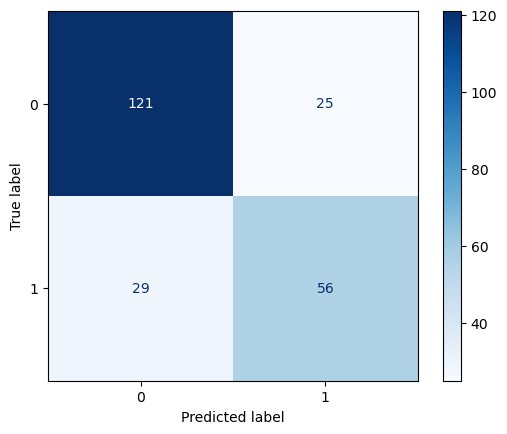

In [76]:

counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [77]:
accuracy = grid_search_aboost.score(X_test, y_test)
print(f"{'Accuracy:':20s}{accuracy:.4f}")

F1 = f1_score(y_test, y_pred)
print(f"{'F1:':20s}{F1:.4f}")


recall = recall_score(y_test, y_pred)
print(f"{'>>Recall:':20s}{recall:.4f}")



precision = precision_score(y_test, y_pred)
print(f"{'Precision:':20s}{precision:.4f}")


performance = pd.concat([performance, pd.DataFrame({"model": 'ADABoost grid search', "accuracy": [accuracy], 
                                                    "F1": [F1], ">>recall": [recall], "precision": [precision]})])


Accuracy:           0.6588
F1:                 0.6747
>>Recall:           0.6588
Precision:          0.6914


In [78]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"ADABoost grid search Test RMSE: {test_rmse}")

rmses = pd.concat([rmses,pd.DataFrame({"model": 'ADABoost grid search', "rmse": [test_rmse]})])

ADABoost grid search Test RMSE: 0.48349377841522817


## Prediction with GradientBoostingClassifier

In [79]:
gboost = GradientBoostingClassifier()

In [80]:
_ = gboost.fit(X_train, np.ravel(y_train))

In [81]:
y_pred = gboost.predict(X_test)

              precision    recall  f1-score   support

           0     0.8113    0.8836    0.8459       146
           1     0.7639    0.6471    0.7006        85

    accuracy                         0.7965       231
   macro avg     0.7876    0.7653    0.7733       231
weighted avg     0.7939    0.7965    0.7924       231

[('Outcome', 1)]


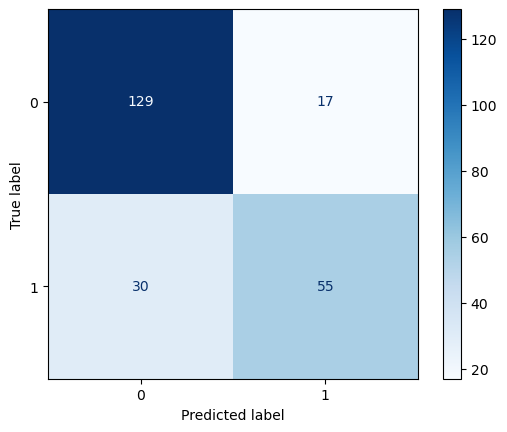

In [82]:
print(classification_report(y_test, y_pred, digits=4))


counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [83]:
accuracy = gboost.score(X_test, y_test)
print(f"{'Accuracy:':20s}{accuracy:.4f}")

F1 = f1_score(y_test, y_pred)
print(f"{'F1:':20s}{F1:.4f}")


recall = recall_score(y_test, y_pred)
print(f"{'>>Recall:':20s}{recall:.4f}")



precision = precision_score(y_test, y_pred)
print(f"{'Precision:':20s}{precision:.4f}")


performance = pd.concat([performance, pd.DataFrame({"model": 'GradientBoost', "accuracy": [accuracy], 
                                                    "F1": [F1], ">>recall": [recall], "precision": [precision]})])


Accuracy:           0.7965
F1:                 0.7006
>>Recall:           0.6471
Precision:          0.7639


Save the recall result from this model

In [84]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"GradientBoost Test RMSE: {test_rmse}")

rmses = pd.concat([rmses,pd.DataFrame({"model": 'GradientBoost', "rmse": [test_rmse]})])

GradientBoost Test RMSE: 0.4510689564392605


## Prediction with GradientBoostingClassifier random search

In [85]:
%%time

score_measure = "recall"
kfolds = 4

param_grid = {
    'min_samples_split': [5,10,50],  
    'min_samples_leaf': [10,20,50],
    'min_impurity_decrease': [0.0010, 0.0020, 0.0030],
    'max_leaf_nodes': [5,25,50], 
    'max_depth': [10,20], 
    'criterion': ['friedman_mse'],
}


rand_search_gboost = RandomizedSearchCV(estimator = gboost, param_distributions=param_grid, cv=kfolds, n_iter=150,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)
_ = rand_search_gboost.fit(X_train, np.ravel(y_train))

print(f"The best {score_measure} score is {rand_search_gboost.best_score_}")
print(f"... with parameters: {rand_search_gboost.best_params_}")

bestRecallTree = rand_search_gboost.best_estimator_

Fitting 4 folds for each of 150 candidates, totalling 600 fits
The best recall score is 0.585024154589372
... with parameters: {'min_samples_split': 5, 'min_samples_leaf': 50, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 50, 'max_depth': 10, 'criterion': 'friedman_mse'}
CPU times: total: 1.33 s
Wall time: 30 s


In [86]:
y_pred = rand_search_gboost.predict(X_test)

In [87]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8075    0.8904    0.8469       146
           1     0.7714    0.6353    0.6968        85

    accuracy                         0.7965       231
   macro avg     0.7894    0.7629    0.7718       231
weighted avg     0.7942    0.7965    0.7917       231



[('Outcome', 1)]


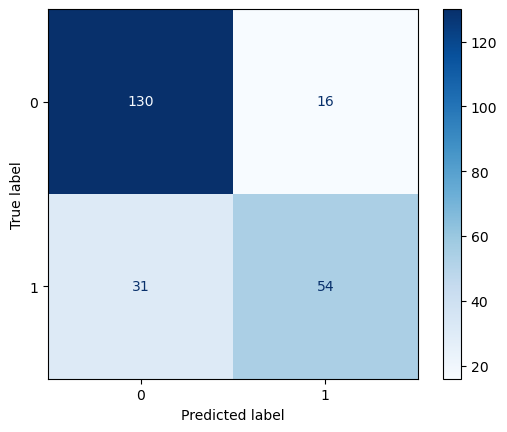

In [88]:

counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [89]:
accuracy = rand_search_gboost.score(X_test, y_test)
print(f"{'Accuracy:':20s}{accuracy:.4f}")

F1 = f1_score(y_test, y_pred)
print(f"{'F1:':20s}{F1:.4f}")


recall = recall_score(y_test, y_pred)
print(f"{'>>Recall:':20s}{recall:.4f}")



precision = precision_score(y_test, y_pred)
print(f"{'Precision:':20s}{precision:.4f}")


performance = pd.concat([performance, pd.DataFrame({"model": 'Gradient Boost Random search', "accuracy": [accuracy], 
                                                    "F1": [F1], ">>recall": [recall], "precision": [precision]})])


Accuracy:           0.6353
F1:                 0.6968
>>Recall:           0.6353
Precision:          0.7714


In [90]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Gradient Boost Random search Test RMSE: {test_rmse}")

rmses = pd.concat([rmses,pd.DataFrame({"model": 'Gradient Boost Random search', "rmse": [test_rmse]})])

Gradient Boost Random search Test RMSE: 0.4510689564392605


## Prediction with GradientBoostingClassifier exhaustive grid search on random search

In [91]:
%%time

score_measure = "recall"

kfolds = 4
min_samples_split = rand_search_gboost.best_params_['min_samples_split']
min_samples_leaf = rand_search_gboost.best_params_['min_samples_leaf']
min_impurity_decrease = rand_search_gboost.best_params_['min_impurity_decrease']
max_leaf_nodes = rand_search_gboost.best_params_['max_leaf_nodes']
max_depth = rand_search_gboost.best_params_['max_depth']
criterion = rand_search_gboost.best_params_['criterion']

param_grid = {
    'min_samples_split': np.arange(min_samples_split-1,min_samples_split+1),  
    'min_samples_leaf': np.arange(min_samples_leaf-1,min_samples_leaf+1),
    'min_impurity_decrease': np.arange(min_impurity_decrease-0.0001, min_impurity_decrease+0.0005),
    'max_leaf_nodes': np.arange(max_leaf_nodes-1,max_leaf_nodes+1), 
    'max_depth': np.arange(max_depth-1,max_depth+1), 
    'criterion': [criterion]
}


grid_search_gboost = GridSearchCV(estimator = gboost, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search_gboost.fit(X_train, np.ravel(y_train))

print(f"The best {score_measure} score is {grid_search_gboost.best_score_}")
print(f"... with parameters: {grid_search_gboost.best_params_}")

bestRecallTree = grid_search_gboost.best_estimator_

Fitting 4 folds for each of 16 candidates, totalling 64 fits
The best recall score is 0.585024154589372
... with parameters: {'criterion': 'friedman_mse', 'max_depth': 9, 'max_leaf_nodes': 49, 'min_impurity_decrease': 0.0009, 'min_samples_leaf': 50, 'min_samples_split': 4}
CPU times: total: 328 ms
Wall time: 2.31 s


In [92]:
y_pred = grid_search_gboost.predict(X_test)

In [93]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8075    0.8904    0.8469       146
           1     0.7714    0.6353    0.6968        85

    accuracy                         0.7965       231
   macro avg     0.7894    0.7629    0.7718       231
weighted avg     0.7942    0.7965    0.7917       231



[('Outcome', 1)]


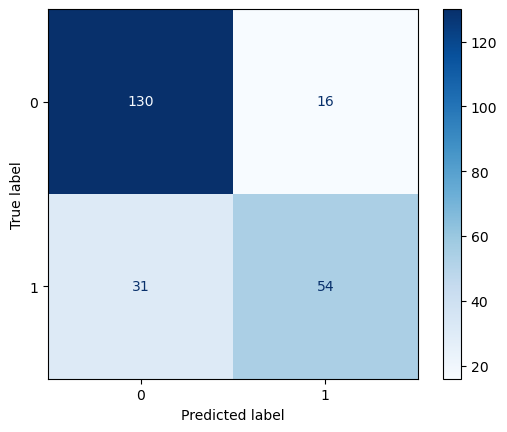

In [94]:

counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [95]:
accuracy = grid_search_gboost.score(X_test, y_test)
print(f"{'Accuracy:':20s}{accuracy:.4f}")

F1 = f1_score(y_test, y_pred)
print(f"{'F1:':20s}{F1:.4f}")


recall = recall_score(y_test, y_pred)
print(f"{'>>Recall:':20s}{recall:.4f}")



precision = precision_score(y_test, y_pred)
print(f"{'Precision:':20s}{precision:.4f}")


performance = pd.concat([performance, pd.DataFrame({"model": 'Gradient Boost grid search', "accuracy": [accuracy], 
                                                    "F1": [F1], ">>recall": [recall], "precision": [precision]})])


Accuracy:           0.6353
F1:                 0.6968
>>Recall:           0.6353
Precision:          0.7714


In [96]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Gradient Boost grid search Test RMSE: {test_rmse}")

rmses = pd.concat([rmses,pd.DataFrame({"model": 'Gradient Boost grid search', "rmse": [test_rmse]})])

Gradient Boost grid search Test RMSE: 0.4510689564392605


## Prediction with XGBoost

In [97]:
xgboost = XGBClassifier()

In [98]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(np.ravel(y_train))
y_test = le.fit_transform(np.ravel(y_test))

In [99]:
_ = xgboost.fit(X_train, y_train)

In [100]:
y_pred = xgboost.predict(X_test)

In [101]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7875    0.8630    0.8235       146
           1     0.7183    0.6000    0.6538        85

    accuracy                         0.7662       231
   macro avg     0.7529    0.7315    0.7387       231
weighted avg     0.7620    0.7662    0.7611       231



[(0, 146), (1, 85)]


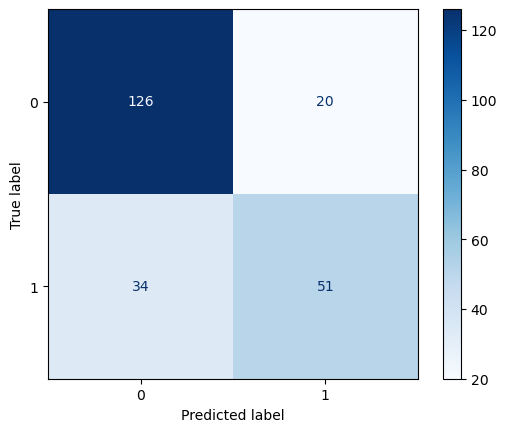

In [102]:

counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [103]:
accuracy = xgboost.score(X_test, y_test)
print(f"{'Accuracy:':20s}{accuracy:.4f}")

F1 = f1_score(y_test, y_pred)
print(f"{'F1:':20s}{F1:.4f}")


recall = recall_score(y_test, y_pred)
print(f"{'>>Recall:':20s}{recall:.4f}")



precision = precision_score(y_test, y_pred)
print(f"{'Precision:':20s}{precision:.4f}")


performance = pd.concat([performance, pd.DataFrame({"model": 'XGBoost', "accuracy": [accuracy], 
                                                    "F1": [F1], ">>recall": [recall], "precision": [precision]})])


Accuracy:           0.7662
F1:                 0.6538
>>Recall:           0.6000
Precision:          0.7183


Save the recall result from this model

In [104]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"XGBoost Test RMSE: {test_rmse}")

rmses = pd.concat([rmses,pd.DataFrame({"model": 'XGBoost', "rmse": [test_rmse]})])

XGBoost Test RMSE: 0.48349377841522817


## Prediction with XGBoost random search

In [105]:
%%time

score_measure = "recall"
kfolds = 4

param_grid = {
    'min_samples_split': [5,10,50],  
    'min_samples_leaf': [10,20,50],
    'min_impurity_decrease': [0.0010, 0.0020, 0.0030],
    'max_leaf_nodes': [5,25,50], 
    'max_depth': [10,20],
    'criterion': ['friedman_mse'],
}

rand_search_xgboost = RandomizedSearchCV(estimator = xgboost, param_distributions=param_grid, cv=kfolds, n_iter=150,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = rand_search_xgboost.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search_xgboost.best_score_}")
print(f"... with parameters: {rand_search_xgboost.best_params_}")

bestRecallTree = rand_search_xgboost.best_estimator_

Fitting 4 folds for each of 150 candidates, totalling 600 fits
[00:58:31] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "criterion", "max_leaf_nodes", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } are not used.

The best recall score is 0.5793478260869566
... with parameters: {'min_samples_split': 5, 'min_samples_leaf': 20, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 25, 'max_depth': 20, 'criterion': 'friedman_mse'}
CPU times: total: 2.11 s
Wall time: 13.5 s


In [106]:
y_pred = rand_search_xgboost.predict(X_test)

In [107]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7987    0.8699    0.8328       146
           1     0.7361    0.6235    0.6752        85

    accuracy                         0.7792       231
   macro avg     0.7674    0.7467    0.7540       231
weighted avg     0.7757    0.7792    0.7748       231



[(0, 146), (1, 85)]


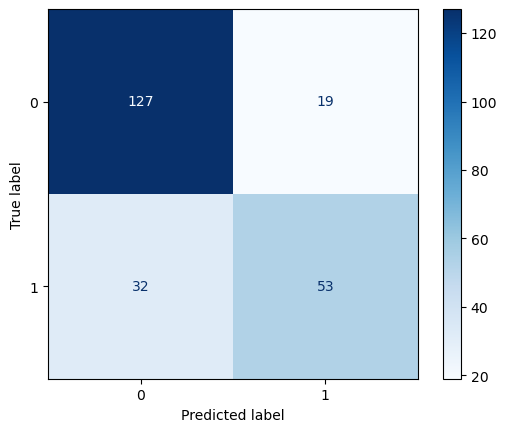

In [108]:

counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [109]:
accuracy = rand_search_xgboost.score(X_test, y_test)
print(f"{'Accuracy:':20s}{accuracy:.4f}")

F1 = f1_score(y_test, y_pred)
print(f"{'F1:':20s}{F1:.4f}")


recall = recall_score(y_test, y_pred)
print(f"{'>>Recall:':20s}{recall:.4f}")



precision = precision_score(y_test, y_pred)
print(f"{'Precision:':20s}{precision:.4f}")


performance = pd.concat([performance, pd.DataFrame({"model": 'XGBoost Random search', "accuracy": [accuracy], 
                                                    "F1": [F1], ">>recall": [recall], "precision": [precision]})])


Accuracy:           0.6235
F1:                 0.6752
>>Recall:           0.6235
Precision:          0.7361


In [110]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"XGBoost Random search Test RMSE: {test_rmse}")

rmses = pd.concat([rmses,pd.DataFrame({"model": 'XGBoost Random search', "rmse": [test_rmse]})])

XGBoost Random search Test RMSE: 0.4698714938993648


## Prediction with XGBoost exhaustive grid search on random search

In [111]:
%%time

score_measure = "recall"

kfolds = 4
min_samples_split = rand_search_xgboost.best_params_['min_samples_split']
min_samples_leaf = rand_search_xgboost.best_params_['min_samples_leaf']
min_impurity_decrease = rand_search_xgboost.best_params_['min_impurity_decrease']
max_leaf_nodes = rand_search_xgboost.best_params_['max_leaf_nodes']
max_depth = rand_search_xgboost.best_params_['max_depth']
criterion = rand_search_xgboost.best_params_['criterion']

param_grid = {
   'min_samples_split': np.arange(min_samples_split-1,min_samples_split+1),  
    'min_samples_leaf': np.arange(min_samples_leaf-1,min_samples_leaf+1),
    'min_impurity_decrease': np.arange(min_impurity_decrease-0.0001, min_impurity_decrease+0.0005),
    'max_leaf_nodes': np.arange(max_leaf_nodes-1,max_leaf_nodes+1), 
    'max_depth': np.arange(max_depth-1,max_depth+1), 
    'criterion': [criterion]
}


grid_search_xgboost = GridSearchCV(estimator = xgboost, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search_xgboost.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search_xgboost.best_score_}")
print(f"... with parameters: {grid_search_xgboost.best_params_}")

bestRecallTree = grid_search_xgboost.best_estimator_

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[00:58:34] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "criterion", "max_leaf_nodes", "min_impurity_decrease", "min_samples_leaf", "min_samples_split" } are not used.

The best recall score is 0.5793478260869566
... with parameters: {'criterion': 'friedman_mse', 'max_depth': 19, 'max_leaf_nodes': 24, 'min_impurity_decrease': 0.0009, 'min_samples_leaf': 19, 'min_samples_split': 4}
CPU times: total: 1.11 s
Wall time: 2.14 s


In [112]:
y_pred = grid_search_xgboost.predict(X_test)

In [113]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7987    0.8699    0.8328       146
           1     0.7361    0.6235    0.6752        85

    accuracy                         0.7792       231
   macro avg     0.7674    0.7467    0.7540       231
weighted avg     0.7757    0.7792    0.7748       231



[(0, 146), (1, 85)]


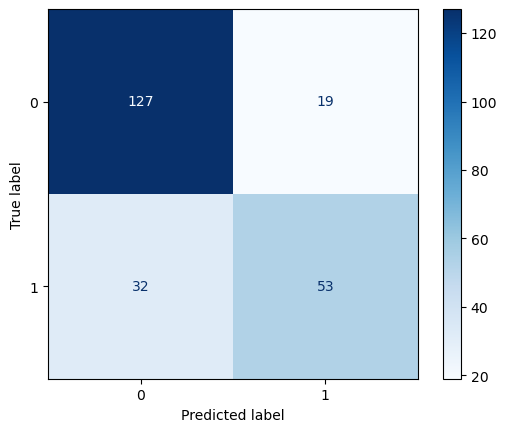

In [114]:

counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [115]:
accuracy = grid_search_xgboost.score(X_test, y_test)
print(f"{'Accuracy:':20s}{accuracy:.4f}")

F1 = f1_score(y_test, y_pred)
print(f"{'F1:':20s}{F1:.4f}")


recall = recall_score(y_test, y_pred)
print(f"{'>>Recall:':20s}{recall:.4f}")



precision = precision_score(y_test, y_pred)
print(f"{'Precision:':20s}{precision:.4f}")


performance = pd.concat([performance, pd.DataFrame({"model": 'XGBoost grid search', "accuracy": [accuracy], 
                                                    "F1": [F1], ">>recall": [recall], "precision": [precision]})])


Accuracy:           0.6235
F1:                 0.6752
>>Recall:           0.6235
Precision:          0.7361


In [116]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"XGBoost grid search RMSE: {test_rmse}")

rmses = pd.concat([rmses,pd.DataFrame({"model": 'XGBoost grid search', "rmse": [test_rmse]})])

XGBoost grid search RMSE: 0.4698714938993648


### Prediction with Neural Networks

In [117]:
%%time

ann = MLPClassifier(hidden_layer_sizes=(128,64,32), solver='adam', max_iter=500)
_ = ann.fit(X_train, y_train)

CPU times: total: 3.53 s
Wall time: 1.61 s


In [118]:
%%time
y_pred = ann.predict(X_test)

CPU times: total: 0 ns
Wall time: 2.64 ms


In [119]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8108    0.8219    0.8163       146
           1     0.6867    0.6706    0.6786        85

    accuracy                         0.7662       231
   macro avg     0.7488    0.7463    0.7474       231
weighted avg     0.7652    0.7662    0.7656       231



[(0, 146), (1, 85)]


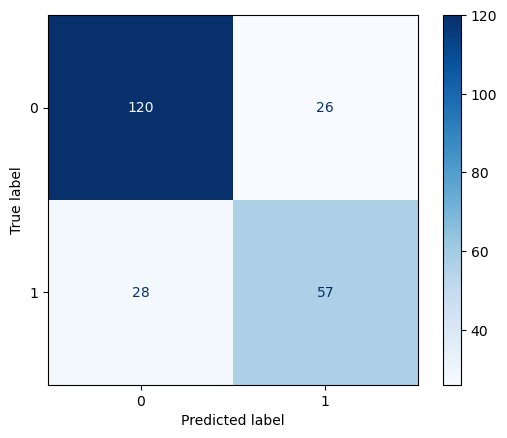

In [120]:

counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [121]:
accuracy = ann.score(X_test, y_test)
print(f"{'Accuracy:':20s}{accuracy:.4f}")

F1 = f1_score(y_test, y_pred)
print(f"{'F1:':20s}{F1:.4f}")


recall = recall_score(y_test, y_pred)
print(f"{'>>Recall:':20s}{recall:.4f}")



precision = precision_score(y_test, y_pred)
print(f"{'Precision:':20s}{precision:.4f}")


performance = pd.concat([performance, pd.DataFrame({"model": 'Neural Networks', "accuracy": [accuracy], 
                                                    "F1": [F1], ">>recall": [recall], "precision": [precision]})])


Accuracy:           0.7662
F1:                 0.6786
>>Recall:           0.6706
Precision:          0.6867


In [122]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Neural Networks Test RMSE: {test_rmse}")

rmses = pd.concat([rmses,pd.DataFrame({"model": 'Neural Networks', "rmse": [test_rmse]})])

Neural Networks Test RMSE: 0.48349377841522817


### Neural Networks With RandomizedSearchCV

In [123]:
%%time

score_measure = "recall"
kfolds = 4

param_grid = {
    'hidden_layer_sizes': [ (32,), (64,), (128,), (32,16), (64,32)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0, .2, .5, .7, 1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.0001, 0.001, 0.01],
    'max_iter': [9000]
}

ann = MLPClassifier(random_state=1)
rand_search = RandomizedSearchCV(
    estimator = ann,                    # the model to use
    param_distributions=param_grid,     # the parameter grid
    cv=kfolds,                      # number of folds
    n_iter=200,                     # number of iterations; this is the number of parameter settings that are sampled
    scoring=score_measure,          # score measure used to evaluate parameter combinations
    verbose=0,                      # verbose level; the higher, the more messages. 0 for no messages
    n_jobs=-1,                      # number of parallel jobs to run >> n_jobs=-1 will utilize all available CPUs 
    random_state=1                  # random state ensures that the splits are the same for each iteration
)

rand_search.fit(X_train, y_train)

bestMLPClassifier = rand_search.best_estimator_

print(rand_search.best_params_)

{'solver': 'sgd', 'max_iter': 9000, 'learning_rate_init': 0.0001, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (64, 32), 'alpha': 0.5, 'activation': 'relu'}
CPU times: total: 2.05 s
Wall time: 1min 5s


In [124]:
%%time
y_pred = bestMLPClassifier.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7571    0.3630    0.4907       146
           1     0.4224    0.8000    0.5528        85

    accuracy                         0.5238       231
   macro avg     0.5898    0.5815    0.5218       231
weighted avg     0.6340    0.5238    0.5136       231

CPU times: total: 0 ns
Wall time: 11.9 ms


[(0, 146), (1, 85)]


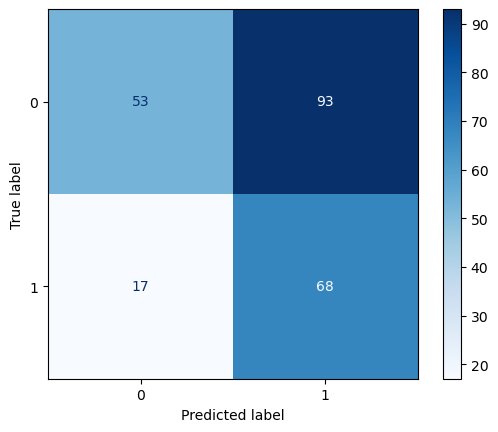

In [125]:

counts = sorted(collections.Counter(y_test).items(), key=lambda i: i[0])
print(counts)

# display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [126]:
accuracy = bestMLPClassifier.score(X_test, y_test)
print(f"{'Accuracy:':20s}{accuracy:.4f}")

F1 = f1_score(y_test, y_pred)
print(f"{'F1:':20s}{F1:.4f}")


recall = recall_score(y_test, y_pred)
print(f"{'>>Recall:':20s}{recall:.4f}")



precision = precision_score(y_test, y_pred)
print(f"{'Precision:':20s}{precision:.4f}")


performance = pd.concat([performance, pd.DataFrame({"model": 'Neural Networks random search', "accuracy": [accuracy], 
                                                    "F1": [F1], ">>recall": [recall], "precision": [precision]})])


Accuracy:           0.5238
F1:                 0.5528
>>Recall:           0.8000
Precision:          0.4224


In [127]:
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Neural Networks random search RMSE: {test_rmse}")

rmses = pd.concat([rmses,pd.DataFrame({"model": 'Neural Networks random search', "rmse": [test_rmse]})])

Neural Networks random search RMSE: 0.6900655593423543


## Step 6: Summarize results     


In [128]:
performance

,model,accuracy,F1,>>recall,precision
0,Logestic Regression,0.783550,0.662162,0.576471,0.777778
0,Logestic Regression liblin,0.783550,0.662162,0.576471,0.777778
0,Logestic Regression L2,0.783550,0.662162,0.576471,0.777778
0,Logestic Regression L1,0.783550,0.662162,0.576471,0.777778
0,Logestic Regression Elastic,0.783550,0.662162,0.576471,0.777778
0,Decision Tree,0.709957,0.588957,0.564706,0.615385
0,Decision Tree Random search,0.623529,0.675159,0.623529,0.736111
0,Decision Tree grid search,0.623529,0.675159,0.623529,0.736111
0,Random forest,0.813853,0.726115,0.670588,0.791667
0,Random forest random search,0.552941,0.648276,0.552941,0.783333


In [129]:
rmses

,model,rmse
0,Logestic Regression,0.465242
0,Logestic Regression liblin,0.465242
0,Logestic Regression L2,0.465242
0,Logestic Regression L1,0.465242
0,Logestic Regression Elastic,0.465242
0,Decision Tree,0.538557
0,Decision Tree Random search,0.469871
0,Decision Tree grid search,0.469871
0,Random forest,0.431448
0,Random forest random search,0.469871


## Section 4

## Conclusion

##### Problem: 
The data set have measurements of different variables based on that we need to find the diabetic patients.
##### Goal:
My goal is to analyze input variables such as Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction,Age and predict the target variable which is outcome, whether a patient can have a diabetes or not.

The performance metrics that I used to measure the performance of the models are

Confusion Matrix

* TP - where I predict person have diabetes and really have diabetes. (Very important - The more TP I have the more profitable I am)
* FP - where I redict preson have diabetes but really dont have diabetes. (important but Not so important - doesnt cost me much I a patient is not diabetec but predicted he is )
* TN - where I predict person dont have diabetes and really dont have diabetes.(Important TN are also important for my profit so that I can give healthy information to patient and warn about future risk)
* FN - where I predict person dont have diabetes but really have diabetes. (Very very important less FN are better. In this case FN costs me more than everything else)



* Accuracy: This is the most intuitive performance measure. It is the ratio of correctly predicted observation to the total observations.

* Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. High precision relates to a low false positive rate.

* Recall (Sensitivity): This is the ratio of correctly predicted positive observations to all actual positives. A model with a higher recall will have fewer false negatives.

* F1 Score: This is the weighted average of precision and recall. Therefore, this score takes both false positives and false negatives into account. It is usually more useful than accuracy, especially if there is an an uneven class distribution.

##### **I am going to use recall as my score measure since in my case it is important to have high true positives and less false negatives.

##### ** As RMSE is not a good score measure for classification type of prblems I used RMSE to support our conclusion but not measure the score.



Based on the Individual and final results the report for the models used to predict the target variable:

* Upon evaluation, the 'Random Forest' model exhibited the highest recall value of 0.670588, out of all models tested. Simultaneously, it also achieved the highest accuracy of 0.813853, an F1 score of 0.726115, and a respectable precision of 0.791667. The RMSE for the Random Forest model is relatively low (0.431448), which indicates a good model fit.

* On the other hand, 'Neural Networks' showcased a slightly higher recall of 0.670588. However, it suffered from a lesser accuracy (0.766234), a lower F1 score (0.678571), and lower precision (0.686747). It also scored slightly higher on the RMSE (0.483494), signifying less accuracy in the prediction of continuous data points.

* While the Neural Networks model using Random Search has high recall, it performs poorly in accuracy, precision, and F1 score. Its precision is notably low, indicating a high false-positive rate, which is problematic for medical diagnoses. Also, it has the highest RMSE value, suggesting a poor model fit. Therefore, despite its high recall, we cannot consider it as the best model due to its overall subpar performance.

* Among the models optimized using Random Search and Grid Search techniques, none of them surpassed the standard Random Forest model in terms of Recall, Accuracy, F1-score, and Precision. But if we use more tuining with different parameters we might get more good results.

In conclusion, the 'Random Forest' model seems to be the most suitable choice for this task considering the goal to maximize recall while ensuring adequate Accuracy, Precision, and F1 score. It also has a relatively low RMSE value. However, if the priority leans towards higher recall, we could also consider 'Neural Networks', acknowledging the trade-off in accuracy, precision, and a slightly higher RMSE.